In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

* f é para usar as chavetas {} na string

* convert('L') é para tornas as fotografias greyscale (monocromático)

In [2]:
import glob
images = [glob.glob('yalefaces/ind{}/*'.format(pasta)) for pasta in range(1, 11)]

In [3]:
base = [Image.open(img).convert('L') for pasta in images for img in pasta]

#### "Chama" a imagem

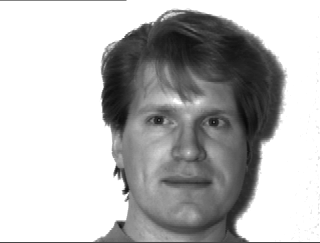

In [4]:
input_img = Image.open(f'yalefaces/ind1/subject01.gif').convert('L')
input_img

#### Saber a quantidade de fotografias que existem

In [5]:
M = len(base)
M

100

#### Gera uma lista de listas em que cada lista corresponde a uma imagem (0 a 399)

In [6]:
X = np.array([base[i].getdata() for i in range(M)])

#### Temos 400 listas em que cada uma 10304 elementos

In [7]:
print(X.shape)
X

(100, 77760)


array([[130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       ...,
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68]])

#### Centrar o X à média

In [8]:
media = np.mean(X, 0)
phi = X - media

In [9]:
media

array([122.23, 121.94, 122.55, ...,  68.  ,  68.  ,  68.  ])

In [10]:
phi.shape

(100, 77760)

* e_faces : vetores singulares
* sigma : valores singulares
* Não vamos usar o v pelo que metemos como "_"

In [11]:
e_faces, sigma, _ = np.linalg.svd(phi.transpose(), full_matrices = False)

In [12]:
e_faces.shape

(77760, 100)

In [13]:
sigma.shape

(100,)

In [27]:
'''
M = np.cov(phi)

print('M: ', M.shape)

import scipy.linalg as sp

eigenValues = sp.eigvals(M)
#eigenValues, eigenVectors = np.linalg.eig(M)

#eigenValues = np.linalg.eigvals(M)

print(eigenValues.shape)


eigenValues = np.dot(phi.transpose(), eigenValues)

print(eigenValues.shape)
#V = np.dot(phi.transpose(), M)
#print('M após multiplicação à esquerda: ', V.shape)


#newSigma2 = singularValues
#newSigma2 = e_faces2
'''

M:  (100, 100)
(100,)
(77760,)


In [28]:
'''
traco2 = sum(eigenValues)
traco2
'''

(280719708369.5774-2.462816058766045e-07j)

#### Os valores singulares são a raiz de um valor próprio, logo:

In [113]:
val_prop = sigma*sigma
val_prop.shape

(100,)

#### Ordenar os valores próprios de forma decrescente

In [114]:
val_prop = np.sort(val_prop)
# o sort dá a lista ordenada crescentemente
# queremos decrescentemente, daí o ::-1
val_prop = val_prop[::-1]

#### Traço da matriz de dispersão (soma de todos valores próprios)

In [115]:
traco = sum(val_prop)
traco

33945729782.909977

#### Calcular o k consoante a confiança da soma dos k primeiros valores próprios.
* parar quando temos uma confiança mínima de 80%;
* parar quando começar a incrementar menos de 0.5% na confiança.

In [55]:
confianca_alvo = 0.85
k = 0
confianca = 0
confiancaAnt = 0

while confianca < confianca_alvo:
    confiancaAnt = confianca
    confianca = confianca + val_prop[k]/traco
    k += 1
    
    print('(confiança, valor próprio): ({0}, {1})'.format(confianca, k))
        
k, confianca

(confiança, valor próprio): (0.3240635086398956, 1)
(confiança, valor próprio): (0.4952175055610759, 2)
(confiança, valor próprio): (0.5998161998002414, 3)
(confiança, valor próprio): (0.6843819477209767, 4)
(confiança, valor próprio): (0.7198546337542329, 5)
(confiança, valor próprio): (0.7508741249435605, 6)
(confiança, valor próprio): (0.7786787454473534, 7)
(confiança, valor próprio): (0.8029380526398948, 8)
(confiança, valor próprio): (0.8212732668244527, 9)
(confiança, valor próprio): (0.8382094374335526, 10)
(confiança, valor próprio): (0.8510144933433734, 11)


(11, 0.8510144933433734)

In [32]:
'''
confianca_alvo = 0.85
k = 0
confianca = 0
confiancaAnt = 0

eigenValues = np.sort_complex(eigenValues)
# o sort dá a lista ordenada crescentemente
# queremos decrescentemente, daí o ::-1
#eigenValues = eigenValues[::-1]

while confianca < confianca_alvo:
    confiancaAnt = confianca
    confianca = confianca + eigenValues[k]/traco2
    k += 1
    
    print('(confiança, valor próprio): ({0}, {1})'.format(confianca, k))
        
k, confianca
'''

(confiança, valor próprio): ((-0.00015779271624768263-2.2593298347696085e-22j), 1)
(confiança, valor próprio): ((-0.00031553898203026394-4.52938334964588e-22j), 2)
(confiança, valor próprio): ((-0.00047282202072359707-6.394680734414914e-22j), 3)
(confiança, valor próprio): ((-0.0006295145323229347-8.509102225098967e-22j), 4)
(confiança, valor próprio): ((-0.0007861147178752117-1.0386949135859737e-21j), 5)
(confiança, valor próprio): ((-0.0009426315948929312-1.2646216951327324e-21j), 6)
(confiança, valor próprio): ((-0.0010990649481529755-1.488518947907444e-21j), 7)
(confiança, valor próprio): ((-0.001255414749356903-1.700638166904472e-21j), 8)
(confiança, valor próprio): ((-0.0014114499694913953-1.904690333624865e-21j), 9)
(confiança, valor próprio): ((-0.0015671617842785346-2.1090315242271734e-21j), 10)
(confiança, valor próprio): ((-0.0017227813698161617-2.3334965092341446e-21j), 11)
(confiança, valor próprio): ((-0.0018782292758738166-2.544317276111766e-21j), 12)
(confiança, valor p

(confiança, valor próprio): ((-0.17615759162979633-2.4231760135881494e-19j), 1322)
(confiança, valor próprio): ((-0.17627822826564377-2.4251603038865906e-19j), 1323)
(confiança, valor próprio): ((-0.17639884924867325-2.4271643588025496e-19j), 1324)
(confiança, valor próprio): ((-0.17651946948248912-2.428413783833075e-19j), 1325)
(confiança, valor próprio): ((-0.1766400545157011-2.430416512838517e-19j), 1326)
(confiança, valor próprio): ((-0.1767606353435161-2.4314058408384433e-19j), 1327)
(confiança, valor próprio): ((-0.17688119562786608-2.432468872717502e-19j), 1328)
(confiança, valor próprio): ((-0.17700171996165723-2.4331173471353627e-19j), 1329)
(confiança, valor próprio): ((-0.1771222364797575-2.435123517101867e-19j), 1330)
(confiança, valor próprio): ((-0.1772427489125834-2.437059828596741e-19j), 1331)
(confiança, valor próprio): ((-0.17736325417524798-2.43906657478814e-19j), 1332)
(confiança, valor próprio): ((-0.17748375640782182-2.4410638525660375e-19j), 1333)
(confiança, val

(confiança, valor próprio): ((-0.344885877173468-4.3300813272282183e-19j), 2927)
(confiança, valor próprio): ((-0.34497713357168985-4.331526589382439e-19j), 2928)
(confiança, valor próprio): ((-0.34506836187168327-4.3329672196532685e-19j), 2929)
(confiança, valor próprio): ((-0.345159574495325-4.333805231021033e-19j), 2930)
(confiança, valor próprio): ((-0.345250745940558-4.335258183063246e-19j), 2931)
(confiança, valor próprio): ((-0.34534191600491193-4.3360539883643915e-19j), 2932)
(confiança, valor próprio): ((-0.345433073119326-4.337546618565461e-19j), 2933)
(confiança, valor próprio): ((-0.3455242195368049-4.339017228062844e-19j), 2934)
(confiança, valor próprio): ((-0.3456153366886485-4.339869910638508e-19j), 2935)
(confiança, valor próprio): ((-0.34570645282150503-4.341366566670736e-19j), 2936)
(confiança, valor próprio): ((-0.3457975615021995-4.342129785896873e-19j), 2937)
(confiança, valor próprio): ((-0.34588866131403634-4.34293442057132e-19j), 2938)
(confiança, valor próprio

(confiança, valor próprio): ((-0.47827552914369403-6.279406415881058e-19j), 4529)
(confiança, valor próprio): ((-0.4783511506798427-6.280639958619818e-19j), 4530)
(confiança, valor próprio): ((-0.47842677115099236-6.281978740929236e-19j), 4531)
(confiança, valor próprio): ((-0.4785023901418537-6.283286812651804e-19j), 4532)
(confiança, valor próprio): ((-0.47857800377506804-6.284608972925086e-19j), 4533)
(confiança, valor próprio): ((-0.478653587406278-6.285323691004176e-19j), 4534)
(confiança, valor próprio): ((-0.47872913083313495-6.286065382989261e-19j), 4535)
(confiança, valor próprio): ((-0.47880466718143117-6.287385885784601e-19j), 4536)
(confiança, valor próprio): ((-0.4788801991333195-6.288058325553636e-19j), 4537)
(confiança, valor próprio): ((-0.47895572767696093-6.288750637364519e-19j), 4538)
(confiança, valor próprio): ((-0.4790312557702694-6.289413262023714e-19j), 4539)
(confiança, valor próprio): ((-0.4791067758812121-6.290098750139463e-19j), 4540)
(confiança, valor própr

(confiança, valor próprio): ((-0.5967688208194397-8.100178878586096e-19j), 6267)
(confiança, valor próprio): ((-0.5968292172277192-8.101580732494573e-19j), 6268)
(confiança, valor próprio): ((-0.5968896099009215-8.103000766207083e-19j), 6269)
(confiança, valor próprio): ((-0.5969499878176666-8.103530475018118e-19j), 6270)
(confiança, valor próprio): ((-0.5970103396926816-8.104813209307481e-19j), 6271)
(confiança, valor próprio): ((-0.5970706907233359-8.105969790354255e-19j), 6272)
(confiança, valor próprio): ((-0.5971310266150175-8.106499130470119e-19j), 6273)
(confiança, valor próprio): ((-0.5971913607895136-8.107747656433955e-19j), 6274)
(confiança, valor próprio): ((-0.5972516941901381-8.108291137439992e-19j), 6275)
(confiança, valor próprio): ((-0.5973120161347604-8.109377297365824e-19j), 6276)
(confiança, valor próprio): ((-0.5973723360596829-8.110653356601856e-19j), 6277)
(confiança, valor próprio): ((-0.5974326533370853-8.111188943695915e-19j), 6278)
(confiança, valor próprio): 

(confiança, valor próprio): ((-0.6775465682095081-9.216464928164225e-19j), 7800)
(confiança, valor próprio): ((-0.6775921971039719-9.216925617458747e-19j), 7801)
(confiança, valor próprio): ((-0.6776378114511471-9.217325123354602e-19j), 7802)
(confiança, valor próprio): ((-0.6776834254539172-9.217757013199329e-19j), 7803)
(confiança, valor próprio): ((-0.6777290222259124-9.218124656789468e-19j), 7804)
(confiança, valor próprio): ((-0.6777746138690409-9.218547244181773e-19j), 7805)
(confiança, valor próprio): ((-0.6778201863096459-9.218954505383779e-19j), 7806)
(confiança, valor próprio): ((-0.6778657572053726-9.219465269848388e-19j), 7807)
(confiança, valor próprio): ((-0.6779113273064844-9.22058865270403e-19j), 7808)
(confiança, valor próprio): ((-0.6779568969530979-9.220955047802378e-19j), 7809)
(confiança, valor próprio): ((-0.6780024580015952-9.221390858438985e-19j), 7810)
(confiança, valor próprio): ((-0.6780480167204754-9.221792583949429e-19j), 7811)
(confiança, valor próprio): (

(confiança, valor próprio): ((-0.7301285028530901-9.898937676225927e-19j), 9128)
(confiança, valor próprio): ((-0.7301625826839712-9.899239689891922e-19j), 9129)
(confiança, valor próprio): ((-0.7301966509816956-9.899507541571386e-19j), 9130)
(confiança, valor próprio): ((-0.7302307104643515-9.899721673173779e-19j), 9131)
(confiança, valor próprio): ((-0.7302647670539149-9.899945907848556e-19j), 9132)
(confiança, valor próprio): ((-0.7302988141017074-9.900350522357938e-19j), 9133)
(confiança, valor próprio): ((-0.7303328557303619-9.900834010472346e-19j), 9134)
(confiança, valor próprio): ((-0.730366883260973-9.901276907696837e-19j), 9135)
(confiança, valor próprio): ((-0.7304009032105809-9.90149238572184e-19j), 9136)
(confiança, valor próprio): ((-0.7304349004150773-9.901794696656074e-19j), 9137)
(confiança, valor próprio): ((-0.7304688975555576-9.902989562925955e-19j), 9138)
(confiança, valor próprio): ((-0.7305028913244602-9.903550565095592e-19j), 9139)
(confiança, valor próprio): ((

(confiança, valor próprio): ((-0.775209389841821-1.0429391431480639e-18j), 10795)
(confiança, valor próprio): ((-0.7752297263925377-1.0429695018814645e-18j), 10796)
(confiança, valor próprio): ((-0.7752500405073214-1.0429873239034376e-18j), 10797)
(confiança, valor próprio): ((-0.7752703517520686-1.0429505962532166e-18j), 10798)
(confiança, valor próprio): ((-0.7752906591237351-1.0429629470337697e-18j), 10799)
(confiança, valor próprio): ((-0.7753109579527719-1.043043466456555e-18j), 10800)
(confiança, valor próprio): ((-0.7753312494033534-1.0430794866054585e-18j), 10801)
(confiança, valor próprio): ((-0.7753515345058617-1.0431129999068536e-18j), 10802)
(confiança, valor próprio): ((-0.7753718171710988-1.043149480166922e-18j), 10803)
(confiança, valor próprio): ((-0.7753920982207966-1.0431645065746154e-18j), 10804)
(confiança, valor próprio): ((-0.7754123742106103-1.0431920729104879e-18j), 10805)
(confiança, valor próprio): ((-0.7754326433498738-1.0432060455765866e-18j), 10806)
(confia

(confiança, valor próprio): ((-0.798816332741214-1.0716138628439236e-18j), 12256)
(confiança, valor próprio): ((-0.7988287881287246-1.0716349772480524e-18j), 12257)
(confiança, valor próprio): ((-0.7988412375925996-1.071658180420065e-18j), 12258)
(confiança, valor próprio): ((-0.7988536854093629-1.0716726765707266e-18j), 12259)
(confiança, valor próprio): ((-0.7988661277407396-1.0716716162291321e-18j), 12260)
(confiança, valor próprio): ((-0.7988785659022865-1.07166978009077e-18j), 12261)
(confiança, valor próprio): ((-0.7988910034286482-1.0717363860246574e-18j), 12262)
(confiança, valor próprio): ((-0.7989034341644798-1.0717454361955196e-18j), 12263)
(confiança, valor próprio): ((-0.7989158539225312-1.0717825072274922e-18j), 12264)
(confiança, valor próprio): ((-0.7989282678900328-1.071807296469897e-18j), 12265)
(confiança, valor próprio): ((-0.7989406801638471-1.071809617392226e-18j), 12266)
(confiança, valor próprio): ((-0.7989530880409317-1.0718319721714844e-18j), 12267)
(confiança

(confiança, valor próprio): ((-0.8143770745197353-1.0962676794942318e-18j), 14024)
(confiança, valor próprio): ((-0.8143825923562761-1.0962730600028333e-18j), 14025)
(confiança, valor próprio): ((-0.8143881101254199-1.0962928782352169e-18j), 14026)
(confiança, valor próprio): ((-0.8143936255344277-1.0962985266026183e-18j), 14027)
(confiança, valor próprio): ((-0.8143991381909418-1.0963064998467391e-18j), 14028)
(confiança, valor próprio): ((-0.8144046500956947-1.096364837093977e-18j), 14029)
(confiança, valor próprio): ((-0.8144101604325189-1.0963745628399833e-18j), 14030)
(confiança, valor próprio): ((-0.8144156698332935-1.0963793963590762e-18j), 14031)
(confiança, valor próprio): ((-0.8144211790299384-1.0963959660429841e-18j), 14032)
(confiança, valor próprio): ((-0.8144266838408785-1.0964007955353139e-18j), 14033)
(confiança, valor próprio): ((-0.8144321875614586-1.0964056240710467e-18j), 14034)
(confiança, valor próprio): ((-0.8144376852177728-1.096410447286465e-18j), 14035)
(confi

(confiança, valor próprio): ((-0.8201052323039421-1.111176704842117e-18j), 15521)
(confiança, valor próprio): ((-0.8201073382081365-1.1111785523984209e-18j), 15522)
(confiança, valor próprio): ((-0.8201094421324886-1.1111803982177652e-18j), 15523)
(confiança, valor próprio): ((-0.8201115459511209-1.1111836274413498e-18j), 15524)
(confiança, valor próprio): ((-0.8201136490690638-1.1111872267017824e-18j), 15525)
(confiança, valor próprio): ((-0.8201157493886891-1.111100390796186e-18j), 15526)
(confiança, valor próprio): ((-0.8201178490354301-1.1111274998567534e-18j), 15527)
(confiança, valor próprio): ((-0.8201199429069528-1.1111413821813554e-18j), 15528)
(confiança, valor próprio): ((-0.820122031943652-1.1111455422309761e-18j), 15529)
(confiança, valor próprio): ((-0.8201241194988113-1.1111552673578255e-18j), 15530)
(confiança, valor próprio): ((-0.8201262005387128-1.1111670787913562e-18j), 15531)
(confiança, valor próprio): ((-0.8201282789210534-1.1111849603046407e-18j), 15532)
(confia

(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17079)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17080)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17081)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17082)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17083)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17084)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17085)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17086)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17087)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17088)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17089)
(confiança, valor próprio): ((-0.8213021956039454-1.1245419079371419e-18j), 17090)
(con

(confiança, valor próprio): ((-0.8206783824498459-1.1314632916869866e-18j), 18860)
(confiança, valor próprio): ((-0.8206775990015281-1.131462604350458e-18j), 18861)
(confiança, valor próprio): ((-0.8206768146423166-1.1314796570844117e-18j), 18862)
(confiança, valor próprio): ((-0.8206760297474653-1.1314789684788074e-18j), 18863)
(confiança, valor próprio): ((-0.820675244256075-1.131488501086813e-18j), 18864)
(confiança, valor próprio): ((-0.8206744585587666-1.1314878117771954e-18j), 18865)
(confiança, valor próprio): ((-0.8206736723998438-1.1314869897873523e-18j), 18866)
(confiança, valor próprio): ((-0.8206728861320204-1.1315213829485859e-18j), 18867)
(confiança, valor próprio): ((-0.8206720996422395-1.1315206929437145e-18j), 18868)
(confiança, valor próprio): ((-0.8206713115755773-1.1315397357268097e-18j), 18869)
(confiança, valor próprio): ((-0.8206705209717627-1.1315390421126058e-18j), 18870)
(confiança, valor próprio): ((-0.8206697295066216-1.1314469673528664e-18j), 18871)
(confia

(confiança, valor próprio): ((-0.8190116531849235-1.1376344086748504e-18j), 20270)
(confiança, valor próprio): ((-0.8190099656969726-1.1376329282043666e-18j), 20271)
(confiança, valor próprio): ((-0.8190082750228096-1.1376314449385487e-18j), 20272)
(confiança, valor próprio): ((-0.8190065839987762-1.1376299613657816e-18j), 20273)
(confiança, valor próprio): ((-0.8190048925292162-1.1376284774021441e-18j), 20274)
(confiança, valor próprio): ((-0.8190032009121513-1.137671722932307e-18j), 20275)
(confiança, valor próprio): ((-0.8190015086660126-1.1376859893511062e-18j), 20276)
(confiança, valor próprio): ((-0.818999815358887-1.1376810934222212e-18j), 20277)
(confiança, valor próprio): ((-0.8189981219750977-1.137679607779188e-18j), 20278)
(confiança, valor próprio): ((-0.8189964278152176-1.1376773789868212e-18j), 20279)
(confiança, valor próprio): ((-0.818994733200974-1.1376759964232204e-18j), 20280)
(confiança, valor próprio): ((-0.8189930350860586-1.1377345862179481e-18j), 20281)
(confian

(confiança, valor próprio): ((-0.81481260309092-1.1554826168994022e-18j), 21837)
(confiança, valor próprio): ((-0.8148087861244753-1.1554792681903606e-18j), 21838)
(confiança, valor próprio): ((-0.8148049651035123-1.1555224008612744e-18j), 21839)
(confiança, valor próprio): ((-0.8148011433755034-1.1555068711516032e-18j), 21840)
(confiança, valor próprio): ((-0.8147973207291481-1.1554866177791643e-18j), 21841)
(confiança, valor próprio): ((-0.8147934974320266-1.1554820489561354e-18j), 21842)
(confiança, valor próprio): ((-0.8147896738614203-1.1554968758020479e-18j), 21843)
(confiança, valor próprio): ((-0.8147858473200863-1.1554935186927442e-18j), 21844)
(confiança, valor próprio): ((-0.8147820207183007-1.1554901615304051e-18j), 21845)
(confiança, valor próprio): ((-0.8147781907340041-1.1554902082577379e-18j), 21846)
(confiança, valor próprio): ((-0.8147743605992693-1.1555495588071999e-18j), 21847)
(confiança, valor próprio): ((-0.8147705283845624-1.1555461967205208e-18j), 21848)
(confi

(confiança, valor próprio): ((-0.8050648515695501-1.1895490850177608e-18j), 23693)
(confiança, valor próprio): ((-0.8050582945669613-1.1895977110200711e-18j), 23694)
(confiança, valor próprio): ((-0.8050517370722151-1.1895987724762783e-18j), 23695)
(confiança, valor próprio): ((-0.80504517929292-1.1896421353514606e-18j), 23696)
(confiança, valor próprio): ((-0.8050386211713334-1.1897161955262975e-18j), 23697)
(confiança, valor próprio): ((-0.8050320628763886-1.1897111842576139e-18j), 23698)
(confiança, valor próprio): ((-0.8050255011648478-1.1897154822651029e-18j), 23699)
(confiança, valor próprio): ((-0.8050189381511826-1.1897759434966025e-18j), 23700)
(confiança, valor próprio): ((-0.8050123745115809-1.1897791918590713e-18j), 23701)
(confiança, valor próprio): ((-0.805005808328848-1.1897734312018046e-18j), 23702)
(confiança, valor próprio): ((-0.8049992407509977-1.1898290645204796e-18j), 23703)
(confiança, valor próprio): ((-0.8049926721989101-1.1898890823558568e-18j), 23704)
(confia

(confiança, valor próprio): ((-0.7938295808512409-1.21452589840934e-18j), 25184)
(confiança, valor próprio): ((-0.7938211616908313-1.2145702594765752e-18j), 25185)
(confiança, valor próprio): ((-0.7938127418198206-1.2145650277846462e-18j), 25186)
(confiança, valor próprio): ((-0.7938043208480318-1.2145576398799377e-18j), 25187)
(confiança, valor próprio): ((-0.7937958989072951-1.2145477517891057e-18j), 25188)
(confiança, valor próprio): ((-0.7937874766187774-1.2146092130605285e-18j), 25189)
(confiança, valor próprio): ((-0.7937790537546981-1.2146597103984434e-18j), 25190)
(confiança, valor próprio): ((-0.7937706307360896-1.214714154435066e-18j), 25191)
(confiança, valor próprio): ((-0.793762207420412-1.2147668440624949e-18j), 25192)
(confiança, valor próprio): ((-0.793753783765694-1.214772578694501e-18j), 25193)
(confiança, valor próprio): ((-0.7937453599329767-1.2147643108171204e-18j), 25194)
(confiança, valor próprio): ((-0.7937369356583827-1.2148262088832569e-18j), 25195)
(confiança

(confiança, valor próprio): ((-0.7790770787393873-1.2537937338462185e-18j), 26826)
(confiança, valor próprio): ((-0.7790675469021354-1.2538458894803069e-18j), 26827)
(confiança, valor próprio): ((-0.7790580145799012-1.2538375265632848e-18j), 26828)
(confiança, valor próprio): ((-0.779048479942614-1.2538892412036978e-18j), 26829)
(confiança, valor próprio): ((-0.7790389452490092-1.2539475338518353e-18j), 26830)
(confiança, valor próprio): ((-0.7790294074437891-1.2539979301015243e-18j), 26831)
(confiança, valor próprio): ((-0.7790198680057194-1.2540513946786738e-18j), 26832)
(confiança, valor próprio): ((-0.7790103282772649-1.254108805835342e-18j), 26833)
(confiança, valor próprio): ((-0.7790007882451124-1.254100436154238e-18j), 26834)
(confiança, valor próprio): ((-0.7789912479601027-1.2541490760797838e-18j), 26835)
(confiança, valor próprio): ((-0.7789817071095655-1.2541933301377578e-18j), 26836)
(confiança, valor próprio): ((-0.7789721659896309-1.2541838795482063e-18j), 26837)
(confia

(confiança, valor próprio): ((-0.7633381229142003-1.3033280134876647e-18j), 28379)
(confiança, valor próprio): ((-0.7633273970569296-1.3033791215815948e-18j), 28380)
(confiança, valor próprio): ((-0.7633166710767907-1.3033841558283581e-18j), 28381)
(confiança, valor próprio): ((-0.7633059450954012-1.3034042958364815e-18j), 28382)
(confiança, valor próprio): ((-0.7632952186907813-1.3034589117473478e-18j), 28383)
(confiança, valor próprio): ((-0.7632844921604452-1.3034495011251582e-18j), 28384)
(confiança, valor próprio): ((-0.7632737646231088-1.3035120097108269e-18j), 28385)
(confiança, valor próprio): ((-0.7632630366232637-1.3035025977994043e-18j), 28386)
(confiança, valor próprio): ((-0.7632523079014483-1.303565982420188e-18j), 28387)
(confiança, valor próprio): ((-0.7632415780376314-1.303626734816215e-18j), 28388)
(confiança, valor próprio): ((-0.7632308477830813-1.303680470275168e-18j), 28389)
(confiança, valor próprio): ((-0.763220114734151-1.3037403428025404e-18j), 28390)
(confian

(confiança, valor próprio): ((-0.7444865048822277-1.360377273787332e-18j), 30048)
(confiança, valor próprio): ((-0.7444746329091566-1.3603576786329543e-18j), 30049)
(confiança, valor próprio): ((-0.744462759788812-1.3604240060818895e-18j), 30050)
(confiança, valor próprio): ((-0.7444508865188149-1.3604147325781385e-18j), 30051)
(confiança, valor próprio): ((-0.7444390127639502-1.3604756959732066e-18j), 30052)
(confiança, valor próprio): ((-0.7444271377099447-1.3604659538624279e-18j), 30053)
(confiança, valor próprio): ((-0.7444152617556119-1.3605314017507581e-18j), 30054)
(confiança, valor próprio): ((-0.7444033847821777-1.3605950945964394e-18j), 30055)
(confiança, valor próprio): ((-0.7443915070176915-1.360651770153838e-18j), 30056)
(confiança, valor próprio): ((-0.7443796288569061-1.3606413491807967e-18j), 30057)
(confiança, valor próprio): ((-0.7443677502749285-1.3607155655066802e-18j), 30058)
(confiança, valor próprio): ((-0.7443558716872146-1.3607731174161273e-18j), 30059)
(confia

(confiança, valor próprio): ((-0.7240422400242894-1.3898185417550498e-18j), 31699)
(confiança, valor próprio): ((-0.7240294583689414-1.389802603327014e-18j), 31700)
(confiança, valor próprio): ((-0.7240166766776861-1.389783559999403e-18j), 31701)
(confiança, valor próprio): ((-0.7240038945928277-1.389764313835079e-18j), 31702)
(confiança, valor próprio): ((-0.7239911124078939-1.3897476703010744e-18j), 31703)
(confiança, valor próprio): ((-0.7239783297490178-1.3897285586274162e-18j), 31704)
(confiança, valor próprio): ((-0.723965545944196-1.3897087709770743e-18j), 31705)
(confiança, valor próprio): ((-0.723952762061714-1.3896899282184477e-18j), 31706)
(confiança, valor próprio): ((-0.7239399773865384-1.389669464833205e-18j), 31707)
(confiança, valor próprio): ((-0.7239271926521822-1.389732799817304e-18j), 31708)
(confiança, valor próprio): ((-0.7239144075077792-1.3897943802930912e-18j), 31709)
(confiança, valor próprio): ((-0.7239016222354883-1.389863415788097e-18j), 31710)
(confiança, 

(confiança, valor próprio): ((-0.7028554641994018-1.4065288228540685e-18j), 33314)
(confiança, valor próprio): ((-0.7028419643434982-1.4065087444819433e-18j), 33315)
(confiança, valor próprio): ((-0.7028284636272375-1.4065723283935743e-18j), 33316)
(confiança, valor próprio): ((-0.7028149613787958-1.4065578501843806e-18j), 33317)
(confiança, valor próprio): ((-0.7028014572972974-1.4066245009036094e-18j), 33318)
(confiança, valor próprio): ((-0.7027879528145268-1.4066025285525349e-18j), 33319)
(confiança, valor próprio): ((-0.7027744477952758-1.4065814331935105e-18j), 33320)
(confiança, valor próprio): ((-0.7027609423260954-1.4065695845468402e-18j), 33321)
(confiança, valor próprio): ((-0.7027474360975914-1.4066393031424492e-18j), 33322)
(confiança, valor próprio): ((-0.7027339296969851-1.4067006893813671e-18j), 33323)
(confiança, valor próprio): ((-0.7027204226890222-1.4067620750874377e-18j), 33324)
(confiança, valor próprio): ((-0.7027069154732528-1.4068278459826169e-18j), 33325)
(con

(confiança, valor próprio): ((-0.6786490636597406-1.4363546695086294e-18j), 35041)
(confiança, valor próprio): ((-0.6786345433934114-1.436341930557987e-18j), 35042)
(confiança, valor próprio): ((-0.6786200219390028-1.4363291905650161e-18j), 35043)
(confiança, valor próprio): ((-0.6786055004610698-1.4363953872370042e-18j), 35044)
(confiança, valor próprio): ((-0.6785909789162589-1.436453690181759e-18j), 35045)
(confiança, valor próprio): ((-0.678576457300672-1.4365058535444296e-18j), 35046)
(confiança, valor próprio): ((-0.6785619356097174-1.436484878693825e-18j), 35047)
(confiança, valor próprio): ((-0.6785474136165152-1.436470315805594e-18j), 35048)
(confiança, valor próprio): ((-0.6785328907812362-1.436468670304951e-18j), 35049)
(confiança, valor próprio): ((-0.6785183678963596-1.4364559290569988e-18j), 35050)
(confiança, valor próprio): ((-0.6785038447801914-1.4364342104875706e-18j), 35051)
(confiança, valor próprio): ((-0.6784893215068603-1.4364214688988187e-18j), 35052)
(confiança

(confiança, valor próprio): ((-0.6572892546178358-1.4583288517314238e-18j), 36471)
(confiança, valor próprio): ((-0.6572739049571994-1.4583063405191296e-18j), 36472)
(confiança, valor próprio): ((-0.6572585543365979-1.4582925355946676e-18j), 36473)
(confiança, valor próprio): ((-0.6572432036964344-1.458271103477125e-18j), 36474)
(confiança, valor próprio): ((-0.6572278524253066-1.4583335023932039e-18j), 36475)
(confiança, valor próprio): ((-0.6572124999574797-1.4583200333337904e-18j), 36476)
(confiança, valor próprio): ((-0.6571971474416551-1.4583903248264292e-18j), 36477)
(confiança, valor próprio): ((-0.6571817945784093-1.4584493147116203e-18j), 36478)
(confiança, valor próprio): ((-0.6571664409433897-1.458508203256667e-18j), 36479)
(confiança, valor próprio): ((-0.6571510856687474-1.4584856871190812e-18j), 36480)
(confiança, valor próprio): ((-0.6571357284541754-1.4585398496666254e-18j), 36481)
(confiança, valor próprio): ((-0.6571203711838399-1.4586000506337558e-18j), 36482)
(confi

(confiança, valor próprio): ((-0.6275431900115893-1.4802323645567784e-18j), 38343)
(confiança, valor próprio): ((-0.6275267537596828-1.4802125448990714e-18j), 38344)
(confiança, valor próprio): ((-0.6275103167000645-1.4802735526917625e-18j), 38345)
(confiança, valor próprio): ((-0.6274938794587809-1.4802531921889969e-18j), 38346)
(confiança, valor próprio): ((-0.6274774417372722-1.4802287814369979e-18j), 38347)
(confiança, valor próprio): ((-0.6274610035360887-1.4802070026523184e-18j), 38348)
(confiança, valor próprio): ((-0.6274445649632858-1.4802693247288857e-18j), 38349)
(confiança, valor próprio): ((-0.6274281261618311-1.4802461279778026e-18j), 38350)
(confiança, valor próprio): ((-0.6274116873197986-1.4802224587111955e-18j), 38351)
(confiança, valor próprio): ((-0.6273952480627946-1.4802010164858815e-18j), 38352)
(confiança, valor próprio): ((-0.6273788078105593-1.4801960052489738e-18j), 38353)
(confiança, valor próprio): ((-0.6273623647020883-1.480181579346413e-18j), 38354)
(conf

(confiança, valor próprio): ((-0.6058673060434617-1.4852306411305736e-18j), 39634)
(confiança, valor próprio): ((-0.6058501754025543-1.4852052849794079e-18j), 39635)
(confiança, valor próprio): ((-0.6058330443203442-1.485180873400926e-18j), 39636)
(confiança, valor próprio): ((-0.6058159123274471-1.4852386402904359e-18j), 39637)
(confiança, valor próprio): ((-0.6057987801074615-1.4852147001936824e-18j), 39638)
(confiança, valor próprio): ((-0.6057816478310558-1.4852764136687437e-18j), 39639)
(confiança, valor próprio): ((-0.6057645153394415-1.4852613150695476e-18j), 39640)
(confiança, valor próprio): ((-0.605747382051869-1.485261831841522e-18j), 39641)
(confiança, valor próprio): ((-0.6057302479960365-1.4852385651054598e-18j), 39642)
(confiança, valor próprio): ((-0.6057131135432036-1.4852159729924206e-18j), 39643)
(confiança, valor próprio): ((-0.6056959780057565-1.4851943923848057e-18j), 39644)
(confiança, valor próprio): ((-0.6056788407956004-1.4851704479100655e-18j), 39645)
(confia

(confiança, valor próprio): ((-0.5772251949908261-1.4933441065345664e-18j), 41262)
(confiança, valor próprio): ((-0.5772071492392017-1.4934037029861979e-18j), 41263)
(confiança, valor próprio): ((-0.5771891030294697-1.4933784885461108e-18j), 41264)
(confiança, valor próprio): ((-0.577171056430597-1.493353948735942e-18j), 41265)
(confiança, valor próprio): ((-0.5771530090623225-1.4933309606847969e-18j), 41266)
(confiança, valor próprio): ((-0.577134961556735-1.493286855233226e-18j), 41267)
(confiança, valor próprio): ((-0.5771169140479265-1.493354782348943e-18j), 41268)
(confiança, valor próprio): ((-0.5770988663152549-1.4934194709596504e-18j), 41269)
(confiança, valor próprio): ((-0.5770808179732151-1.493395807082879e-18j), 41270)
(confiança, valor próprio): ((-0.577062769440524-1.4933743029470697e-18j), 41271)
(confiança, valor próprio): ((-0.5770447204984354-1.4933487486241656e-18j), 41272)
(confiança, valor próprio): ((-0.5770266696085686-1.4933321022138595e-18j), 41273)
(confiança,

(confiança, valor próprio): ((-0.5536754598358874-1.4934391272367362e-18j), 42543)
(confiança, valor próprio): ((-0.5536567361043533-1.4934137233745866e-18j), 42544)
(confiança, valor próprio): ((-0.5536380120679049-1.4933966213921676e-18j), 42545)
(confiança, valor próprio): ((-0.5536192875021443-1.4933705418268123e-18j), 42546)
(confiança, valor próprio): ((-0.55360056287832-1.4933541143003958e-18j), 42547)
(confiança, valor próprio): ((-0.5535818381006797-1.4933006809704734e-18j), 42548)
(confiança, valor próprio): ((-0.5535631131779222-1.493274736086181e-18j), 42549)
(confiança, valor próprio): ((-0.553544387528369-1.4932490605527827e-18j), 42550)
(confiança, valor próprio): ((-0.5535256616726276-1.4932223723815106e-18j), 42551)
(confiança, valor próprio): ((-0.5535069357433829-1.4931964941113367e-18j), 42552)
(confiança, valor próprio): ((-0.553488209441283-1.493171627971029e-18j), 42553)
(confiança, valor próprio): ((-0.5534694821160152-1.4932288723144673e-18j), 42554)
(confiança

(confiança, valor próprio): ((-0.5070198928697215-1.4944299478514997e-18j), 44932)
(confiança, valor próprio): ((-0.506999412893993-1.4944860930930861e-18j), 44933)
(confiança, valor próprio): ((-0.5069789328823135-1.4945479392859807e-18j), 44934)
(confiança, valor próprio): ((-0.5069584494998354-1.4945299687617171e-18j), 44935)
(confiança, valor próprio): ((-0.5069379649274419-1.4945119971935146e-18j), 44936)
(confiança, valor próprio): ((-0.5069174791747251-1.494484102511381e-18j), 44937)
(confiança, valor próprio): ((-0.5068969921261828-1.4944367471707023e-18j), 44938)
(confiança, valor próprio): ((-0.5068765049836482-1.4944173566847495e-18j), 44939)
(confiança, valor próprio): ((-0.5068560172475826-1.4944141857258622e-18j), 44940)
(confiança, valor próprio): ((-0.5068355291500595-1.4943948611223452e-18j), 44941)
(confiança, valor próprio): ((-0.5068150410361539-1.49438140642435e-18j), 44942)
(confiança, valor próprio): ((-0.5067945464889132-1.4943539090093782e-18j), 44943)
(confian

(confiança, valor próprio): ((-0.48621379597901415-1.4940313825218132e-18j), 45925)
(confiança, valor próprio): ((-0.4861923809896363-1.4940022676170225e-18j), 45926)
(confiança, valor próprio): ((-0.4861709650352538-1.4940070522776667e-18j), 45927)
(confiança, valor próprio): ((-0.48614954842307784-1.4939814458000247e-18j), 45928)
(confiança, valor próprio): ((-0.4861281315797235-1.4939534092228119e-18j), 45929)
(confiança, valor próprio): ((-0.48610671451345167-1.4939346195571158e-18j), 45930)
(confiança, valor próprio): ((-0.48608529669125616-1.4939912576166908e-18j), 45931)
(confiança, valor próprio): ((-0.48606387782766025-1.4940413506482711e-18j), 45932)
(confiança, valor próprio): ((-0.48604245873647106-1.4940936022231078e-18j), 45933)
(confiança, valor próprio): ((-0.48602103515986267-1.4940660322185865e-18j), 45934)
(confiança, valor próprio): ((-0.48599961063439884-1.4940382588902173e-18j), 45935)
(confiança, valor próprio): ((-0.4859781857518699-1.4940069457276907e-18j), 459

(confiança, valor próprio): ((-0.44784271615571997-1.4883256102404337e-18j), 47635)
(confiança, valor próprio): ((-0.44781914239070675-1.488285932479557e-18j), 47636)
(confiança, valor próprio): ((-0.44779556809942495-1.4882553281542636e-18j), 47637)
(confiança, valor próprio): ((-0.4477719927705635-1.4882270178211675e-18j), 47638)
(confiança, valor próprio): ((-0.44774841716259606-1.488197289803433e-18j), 47639)
(confiança, valor próprio): ((-0.44772483967526366-1.488250278992472e-18j), 47640)
(confiança, valor próprio): ((-0.4477012540820656-1.4883021140072432e-18j), 47641)
(confiança, valor próprio): ((-0.4476776663745699-1.4883629878984666e-18j), 47642)
(confiança, valor próprio): ((-0.4476540750333306-1.488339590807995e-18j), 47643)
(confiança, valor próprio): ((-0.4476304775393519-1.4883652373708162e-18j), 47644)
(confiança, valor próprio): ((-0.44760687938511856-1.4883767502796444e-18j), 47645)
(confiança, valor próprio): ((-0.4475832792737619-1.4883253107300443e-18j), 47646)
(c

(confiança, valor próprio): ((-0.4133288602692438-1.4723710236439681e-18j), 49042)
(confiança, valor próprio): ((-0.41330344350784-1.4723584406600059e-18j), 49043)
(confiança, valor próprio): ((-0.4132780260373775-1.4723356372591635e-18j), 49044)
(confiança, valor próprio): ((-0.4132526070450816-1.4723133366152978e-18j), 49045)
(confiança, valor próprio): ((-0.4132271877958001-1.4722827335987344e-18j), 49046)
(confiança, valor próprio): ((-0.41320176806679915-1.472258574777899e-18j), 49047)
(confiança, valor próprio): ((-0.4131763470586304-1.4722362723654637e-18j), 49048)
(confiança, valor próprio): ((-0.41315092241847534-1.4722154193144564e-18j), 49049)
(confiança, valor próprio): ((-0.41312549564055834-1.472189466994964e-18j), 49050)
(confiança, valor próprio): ((-0.41310006847117975-1.4721875320465095e-18j), 49051)
(confiança, valor próprio): ((-0.4130746411057094-1.4721652240566728e-18j), 49052)
(confiança, valor próprio): ((-0.41304920997260497-1.4722208713212384e-18j), 49053)
(co

(confiança, valor próprio): ((-0.36716326990212045-1.4428569611485446e-18j), 50785)
(confiança, valor próprio): ((-0.36713579353567194-1.4428328555248536e-18j), 50786)
(confiança, valor próprio): ((-0.36710831629463614-1.4428334414312318e-18j), 50787)
(confiança, valor próprio): ((-0.36708083903606065-1.442767539778948e-18j), 50788)
(confiança, valor próprio): ((-0.36705336010191375-1.442672496151913e-18j), 50789)
(confiança, valor próprio): ((-0.3670258760673035-1.4426483838007742e-18j), 50790)
(confiança, valor próprio): ((-0.3669983896780558-1.44262426938386e-18j), 50791)
(confiança, valor próprio): ((-0.3669709011073056-1.4426001530530654e-18j), 50792)
(confiança, valor próprio): ((-0.3669434122788812-1.4425609912391083e-18j), 50793)
(confiança, valor próprio): ((-0.3669159234110877-1.4425994855728603e-18j), 50794)
(confiança, valor próprio): ((-0.36688842991244097-1.4425544829076375e-18j), 50795)
(confiança, valor próprio): ((-0.36686093464996145-1.4425003685243015e-18j), 50796)
(

(confiança, valor próprio): ((-0.3234718930263722-1.4090584954812644e-18j), 52332)
(confiança, valor próprio): ((-0.3234429988006257-1.4091182221438558e-18j), 52333)
(confiança, valor próprio): ((-0.3234141031095411-1.4090928713152853e-18j), 52334)
(confiança, valor próprio): ((-0.3233852072047236-1.4090589528246178e-18j), 52335)
(confiança, valor próprio): ((-0.32335631098771955-1.4090336015346467e-18j), 52336)
(confiança, valor próprio): ((-0.323327414707214-1.4090082501889641e-18j), 52337)
(confiança, valor próprio): ((-0.3232985181149442-1.408982898569764e-18j), 52338)
(confiança, valor próprio): ((-0.3232696213121447-1.408946454946384e-18j), 52339)
(confiança, valor próprio): ((-0.3232407230360952-1.4089211018499667e-18j), 52340)
(confiança, valor próprio): ((-0.3232118243740907-1.408896119066521e-18j), 52341)
(confiança, valor próprio): ((-0.3231829241677844-1.4088791312019943e-18j), 52342)
(confiança, valor próprio): ((-0.32315402316800185-1.4088537757159857e-18j), 52343)
(confi

(confiança, valor próprio): ((-0.27901453741703036-1.3722614659711557e-18j), 53842)
(confiança, valor próprio): ((-0.2789845233270249-1.372235133946488e-18j), 53843)
(confiança, valor próprio): ((-0.27895450815677836-1.372208800974101e-18j), 53844)
(confiança, valor próprio): ((-0.2789244924976139-1.3721824675727755e-18j), 53845)
(confiança, valor próprio): ((-0.27889447509754817-1.3721561326441187e-18j), 53846)
(confiança, valor próprio): ((-0.2788644570889994-1.3721297971816264e-18j), 53847)
(confiança, valor próprio): ((-0.2788344365290868-1.3720614952978102e-18j), 53848)
(confiança, valor próprio): ((-0.2788044148346679-1.3720351566016225e-18j), 53849)
(confiança, valor próprio): ((-0.27877439305243656-1.3719653694853984e-18j), 53850)
(confiança, valor próprio): ((-0.27874437091733867-1.3719390304025934e-18j), 53851)
(confiança, valor próprio): ((-0.27871434796476935-1.3719126906026025e-18j), 53852)
(confiança, valor próprio): ((-0.2786843234416221-1.3718876646477037e-18j), 53853)


(confiança, valor próprio): ((-0.23118815859371103-1.3316481187888367e-18j), 55401)
(confiança, valor próprio): ((-0.2311567579316762-1.3316316351623447e-18j), 55402)
(confiança, valor próprio): ((-0.2311253568295937-1.3315816869442853e-18j), 55403)
(confiança, valor próprio): ((-0.2310939554805355-1.3315292738931502e-18j), 55404)
(confiança, valor próprio): ((-0.2310625514612199-1.3315017224527724e-18j), 55405)
(confiança, valor próprio): ((-0.23103114379865447-1.3314000195425484e-18j), 55406)
(confiança, valor próprio): ((-0.23099973415207323-1.3313707082398135e-18j), 55407)
(confiança, valor próprio): ((-0.23096832344723464-1.3313340766483561e-18j), 55408)
(confiança, valor próprio): ((-0.2309369112523482-1.3313049656013328e-18j), 55409)
(confiança, valor próprio): ((-0.23090549893910986-1.3312774068845131e-18j), 55410)
(confiança, valor próprio): ((-0.23087408636296367-1.3312478253536693e-18j), 55411)
(confiança, valor próprio): ((-0.23084267110929016-1.331220264057141e-18j), 55412

(confiança, valor próprio): ((-0.17839937913300905-1.2835869556593968e-18j), 57038)
(confiança, valor próprio): ((-0.1783663739410906-1.2835579994748982e-18j), 57039)
(confiança, valor próprio): ((-0.17833336873929795-1.2835290432817368e-18j), 57040)
(confiança, valor próprio): ((-0.1783003627315192-1.283491311754303e-18j), 57041)
(confiança, valor próprio): ((-0.1782673565515342-1.283462354702952e-18j), 57042)
(confiança, valor próprio): ((-0.17823434918581912-1.2834332616170694e-18j), 57043)
(confiança, valor próprio): ((-0.17820134152878517-1.283396811088216e-18j), 57044)
(confiança, valor próprio): ((-0.17816833325715026-1.2833580651176708e-18j), 57045)
(confiança, valor próprio): ((-0.17813532433751242-1.2833018114241439e-18j), 57046)
(confiança, valor próprio): ((-0.1781023139860502-1.2832728507130634e-18j), 57047)
(confiança, valor próprio): ((-0.1780693019155663-1.2832438884938473e-18j), 57048)
(confiança, valor próprio): ((-0.17803628895918272-1.2832149254974118e-18j), 57049)


(confiança, valor próprio): ((-0.12830222003865452-1.2364130310288151e-18j), 58527)
(confiança, valor próprio): ((-0.12826792554877456-1.236353764606013e-18j), 58528)
(confiança, valor próprio): ((-0.12823362943546712-1.2363237749769649e-18j), 58529)
(confiança, valor próprio): ((-0.12819933289864238-1.2363035030096393e-18j), 58530)
(confiança, valor próprio): ((-0.12816503625286801-1.2362646391769605e-18j), 58531)
(confiança, valor próprio): ((-0.12813073933313385-1.2362345497310935e-18j), 58532)
(confiança, valor próprio): ((-0.12809644102605236-1.2362044590680762e-18j), 58533)
(confiança, valor próprio): ((-0.12806214270358734-1.2361743683915626e-18j), 58534)
(confiança, valor próprio): ((-0.1280278433120663-1.2361380030397511e-18j), 58535)
(confiança, valor próprio): ((-0.12799354386102862-1.2361079113731157e-18j), 58536)
(confiança, valor próprio): ((-0.12795924381969181-1.2361449153713556e-18j), 58537)
(confiança, valor próprio): ((-0.1279249435930355-1.2361148230242528e-18j), 58

(confiança, valor próprio): ((-0.07920990641361225-1.189957029117002e-18j), 59934)
(confiança, valor próprio): ((-0.079174409751907-1.1899258871109819e-18j), 59935)
(confiança, valor próprio): ((-0.07913891220881927-1.1898943393489132e-18j), 59936)
(confiança, valor próprio): ((-0.07910341416124035-1.1898631961270353e-18j), 59937)
(confiança, valor próprio): ((-0.07906791520384003-1.1898320521069512e-18j), 59938)
(confiança, valor próprio): ((-0.07903241478230173-1.1897926046551075e-18j), 59939)
(confiança, valor próprio): ((-0.0789969141074504-1.1897614591282656e-18j), 59940)
(confiança, valor próprio): ((-0.07896141287066291-1.1897303131084246e-18j), 59941)
(confiança, valor próprio): ((-0.07892590951092399-1.1896991652260715e-18j), 59942)
(confiança, valor próprio): ((-0.07889040594205989-1.1896680171602482e-18j), 59943)
(confiança, valor próprio): ((-0.07885490086053867-1.1896368677673374e-18j), 59944)
(confiança, valor próprio): ((-0.07881939507736266-1.1895999805026273e-18j), 599

(confiança, valor próprio): ((-0.01858501879669199-1.1327022479778344e-18j), 61611)
(confiança, valor próprio): ((-0.018548167916073235-1.1326568589385216e-18j), 61612)
(confiança, valor próprio): ((-0.018511316764611385-1.132624528608695e-18j), 61613)
(confiança, valor próprio): ((-0.01847446507552774-1.1325876438871646e-18j), 61614)
(confiança, valor próprio): ((-0.01843761314424267-1.1325553128731819e-18j), 61615)
(confiança, valor próprio): ((-0.018400760548091748-1.1325243979388063e-18j), 61616)
(confiança, valor próprio): ((-0.018363907874543277-1.1324920662736194e-18j), 61617)
(confiança, valor próprio): ((-0.018327054362607363-1.1324634458267261e-18j), 61618)
(confiança, valor próprio): ((-0.018290200538504567-1.1324226085134977e-18j), 61619)
(confiança, valor próprio): ((-0.018253345372843427-1.1323902746619252e-18j), 61620)
(confiança, valor próprio): ((-0.018216488861710196-1.1323579396299405e-18j), 61621)
(confiança, valor próprio): ((-0.018179632233970636-1.132325604495654

(confiança, valor próprio): ((0.04377820226668907-1.0741114429872997e-18j), 63263)
(confiança, valor próprio): ((0.04381678222281839-1.0740775959389205e-18j), 63264)
(confiança, valor próprio): ((0.04385536439072992-1.0740368622426296e-18j), 63265)
(confiança, valor próprio): ((0.04389394664797698-1.0739887115520777e-18j), 63266)
(confiança, valor próprio): ((0.04393253059472409-1.0739496637234756e-18j), 63267)
(confiança, valor próprio): ((0.043971117100812696-1.0739106811466387e-18j), 63268)
(confiança, valor próprio): ((0.04400970388045455-1.073924965369138e-18j), 63269)
(confiança, valor próprio): ((0.044048291759617435-1.0738885464786896e-18j), 63270)
(confiança, valor próprio): ((0.04408687994257453-1.0738669708642824e-18j), 63271)
(confiança, valor próprio): ((0.04412546823571317-1.0738331165016606e-18j), 63272)
(confiança, valor próprio): ((0.044164057778360036-1.0737992610428176e-18j), 63273)
(confiança, valor próprio): ((0.044202648119119725-1.0737733695453513e-18j), 63274)
(

(confiança, valor próprio): ((0.1116555466741062-1.0077428037330924e-18j), 64955)
(confiança, valor próprio): ((0.1116978188305531-1.0076938437669953e-18j), 64956)
(confiança, valor próprio): ((0.11174009231839-1.007656756301598e-18j), 64957)
(confiança, valor próprio): ((0.11178236874761076-1.0076196662556598e-18j), 64958)
(confiança, valor próprio): ((0.11182464598370659-1.0075799107246288e-18j), 64959)
(confiança, valor próprio): ((0.11186692343954258-1.0075327006462612e-18j), 64960)
(confiança, valor próprio): ((0.11190920513878146-1.0074944589140069e-18j), 64961)
(confiança, valor próprio): ((0.1119514891682156-1.0074621193885295e-18j), 64962)
(confiança, valor próprio): ((0.11199377443463084-1.007425021589525e-18j), 64963)
(confiança, valor próprio): ((0.11203606027602492-1.0073669402235213e-18j), 64964)
(confiança, valor próprio): ((0.11207834980127071-1.0072940791917264e-18j), 64965)
(confiança, valor próprio): ((0.11212063987754346-1.0072179446482482e-18j), 64966)
(confiança, 

(confiança, valor próprio): ((0.18508817014225773-9.347374176588463e-19j), 66600)
(confiança, valor próprio): ((0.18513518467519127-9.346921552730704e-19j), 66601)
(confiança, valor próprio): ((0.18518220659370638-9.34650901904468e-19j), 66602)
(confiança, valor próprio): ((0.18522923228301627-9.346175736158697e-19j), 66603)
(confiança, valor próprio): ((0.18527626719997758-9.345960757923289e-19j), 66604)
(confiança, valor próprio): ((0.18532330685789122-9.34569075706425e-19j), 66605)
(confiança, valor próprio): ((0.1853703467621284-9.345278065585511e-19j), 66606)
(confiança, valor próprio): ((0.18541738749391493-9.3448653668465e-19j), 66607)
(confiança, valor próprio): ((0.18546443161677337-9.344475209110745e-19j), 66608)
(confiança, valor próprio): ((0.185511478160654-9.344294521332585e-19j), 66609)
(confiança, valor próprio): ((0.18555853458728588-9.343651620671315e-19j), 66610)
(confiança, valor próprio): ((0.18560559338615376-9.343238763425804e-19j), 66611)
(confiança, valor própr

(confiança, valor próprio): ((0.28290505816716294-8.266269839234884e-19j), 68547)
(confiança, valor próprio): ((0.28295869386919104-8.265706509708525e-19j), 68548)
(confiança, valor próprio): ((0.28301233041651175-8.265148591958383e-19j), 68549)
(confiança, valor próprio): ((0.28306597123182714-8.264766676096239e-19j), 68550)
(confiança, valor próprio): ((0.2831196136489212-8.264469133133639e-19j), 68551)
(confiança, valor próprio): ((0.28317325648726166-8.264016389683525e-19j), 68552)
(confiança, valor próprio): ((0.2832269058290843-8.264015263011805e-19j), 68553)
(confiança, valor próprio): ((0.2832805640494387-8.26313463924216e-19j), 68554)
(confiança, valor próprio): ((0.28333422518201606-8.262226019398498e-19j), 68555)
(confiança, valor próprio): ((0.28338788956455796-8.261323071397372e-19j), 68556)
(confiança, valor próprio): ((0.2834415558605241-8.260564476669824e-19j), 68557)
(confiança, valor próprio): ((0.2834952276751438-8.260062564947444e-19j), 68558)
(confiança, valor próp

(confiança, valor próprio): ((0.390508816455436-7.031307074550408e-19j), 70424)
(confiança, valor próprio): ((0.39056974397351973-7.030883161575474e-19j), 70425)
(confiança, valor próprio): ((0.3906306731296546-7.030429215485238e-19j), 70426)
(confiança, valor próprio): ((0.39069160255894236-7.029722963675965e-19j), 70427)
(confiança, valor próprio): ((0.3907525379303872-7.029409333786134e-19j), 70428)
(confiança, valor próprio): ((0.3908134753581285-7.028998236013042e-19j), 70429)
(confiança, valor próprio): ((0.3908744170543652-7.028183978279847e-19j), 70430)
(confiança, valor próprio): ((0.3909353648684361-7.027773464356509e-19j), 70431)
(confiança, valor próprio): ((0.39099631311002475-7.027137868995241e-19j), 70432)
(confiança, valor próprio): ((0.39105726404273383-7.026185196066655e-19j), 70433)
(confiança, valor próprio): ((0.39111822177883815-7.025239158783118e-19j), 70434)
(confiança, valor próprio): ((0.3911791922469111-7.02421410030384e-19j), 70435)
(confiança, valor próprio

(confiança, valor próprio): ((0.483699075975486-5.955228389593264e-19j), 71881)
(confiança, valor próprio): ((0.4837662103720325-5.954319604236682e-19j), 71882)
(confiança, valor próprio): ((0.4838333448276102-5.953709035271862e-19j), 71883)
(confiança, valor próprio): ((0.48390048495894267-5.953120000057364e-19j), 71884)
(confiança, valor próprio): ((0.48396762882670363-5.952578180054769e-19j), 71885)
(confiança, valor próprio): ((0.48403477612421786-5.951974919225006e-19j), 71886)
(confiança, valor próprio): ((0.4841019411907765-5.951544213590772e-19j), 71887)
(confiança, valor próprio): ((0.4841691126026926-5.951029786918156e-19j), 71888)
(confiança, valor próprio): ((0.4842362853027087-5.950107173859e-19j), 71889)
(confiança, valor próprio): ((0.48430346268026675-5.949861158639593e-19j), 71890)
(confiança, valor próprio): ((0.48437064790159495-5.948437902216818e-19j), 71891)
(confiança, valor próprio): ((0.4844378386062858-5.947532325487902e-19j), 71892)
(confiança, valor próprio):

(confiança, valor próprio): ((0.5991577513615661-4.631341745436381e-19j), 73494)
(confiança, valor próprio): ((0.599233880266648-4.629800829150503e-19j), 73495)
(confiança, valor próprio): ((0.5993100098004198-4.628482936816339e-19j), 73496)
(confiança, valor próprio): ((0.5993861451077392-4.627814984934391e-19j), 73497)
(confiança, valor próprio): ((0.5994622825962035-4.626994875859645e-19j), 73498)
(confiança, valor próprio): ((0.5995384202672984-4.625991231248321e-19j), 73499)
(confiança, valor próprio): ((0.5996145582389577-4.625137045477842e-19j), 73500)
(confiança, valor próprio): ((0.5996906973492068-4.6243421966983e-19j), 73501)
(confiança, valor próprio): ((0.5997668495145987-4.623441984468973e-19j), 73502)
(confiança, valor próprio): ((0.5998430071920177-4.62258458261809e-19j), 73503)
(confiança, valor próprio): ((0.5999191664103005-4.622695624402957e-19j), 73504)
(confiança, valor próprio): ((0.5999953305657939-4.621620254858668e-19j), 73505)
(confiança, valor próprio): ((0.

(confiança, valor próprio): ((0.7397605262310902-3.0740756300767245e-19j), 75229)
(confiança, valor próprio): ((0.7398465667109986-3.073049212672664e-19j), 75230)
(confiança, valor próprio): ((0.7399326078120804-3.0719374467322493e-19j), 75231)
(confiança, valor próprio): ((0.7400186496509924-3.071264929159721e-19j), 75232)
(confiança, valor próprio): ((0.7401047006272545-3.0701014432183295e-19j), 75233)
(confiança, valor próprio): ((0.7401907538144423-3.0690330855302363e-19j), 75234)
(confiança, valor próprio): ((0.7402768211643869-3.0680840307853203e-19j), 75235)
(confiança, valor próprio): ((0.7403628954727453-3.0669193490530625e-19j), 75236)
(confiança, valor próprio): ((0.7404489753003637-3.0659674538789243e-19j), 75237)
(confiança, valor próprio): ((0.7405350669791059-3.065322781812579e-19j), 75238)
(confiança, valor próprio): ((0.7406211729539921-3.0646776448951825e-19j), 75239)
(confiança, valor próprio): ((0.7407072793872965-3.063654694811e-19j), 75240)
(confiança, valor própr

(76441, (0.8500744142248874-1.911898667226883e-19j))

#### Vamos ver onde se encontra o nosso k escolhido (método do cotovelo / elbow plot)

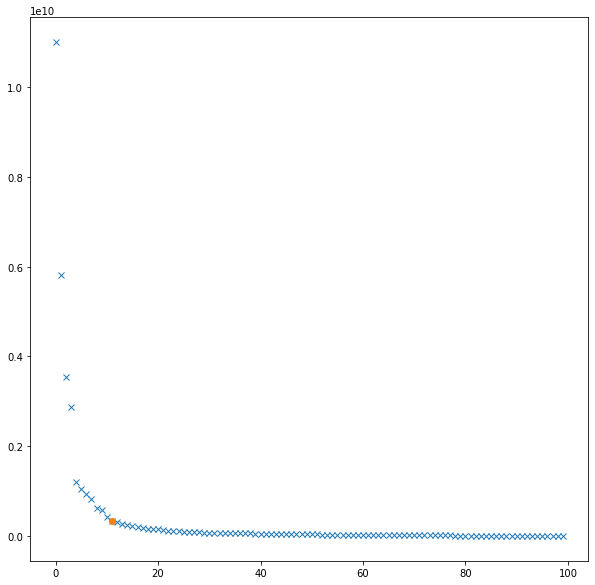

In [56]:
plt.figure(figsize = (10, 10))
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

#### Queremos os k primeiros vetores próprios

In [57]:
newE_Faces = e_faces[:, 0:k]

In [58]:
phi.shape

(100, 77760)

In [59]:
newE_Faces.shape

(77760, 11)

In [60]:
coef_proj = [np.dot(phi[i], newE_Faces) for i in range(M)]

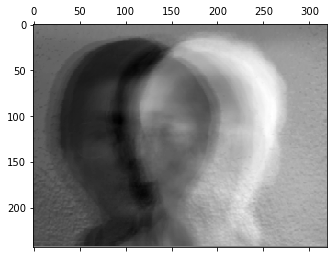

In [61]:
display(plt.matshow(np.reshape(newE_Faces.T[0], (243, 320)), cmap = 'gray'))

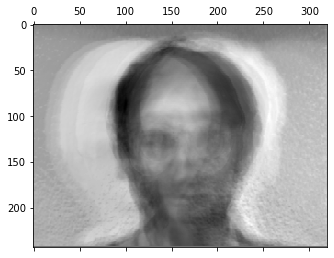

In [62]:
display(plt.matshow(np.reshape(newE_Faces.T[1], (243, 320)), cmap = 'gray'))

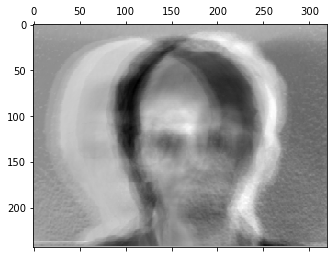

In [63]:
display(plt.matshow(np.reshape(newE_Faces.T[2], (243, 320)), cmap = 'gray'))

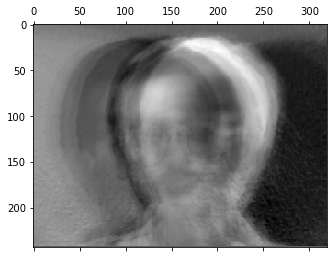

In [64]:
display(plt.matshow(np.reshape(newE_Faces.T[3], (243, 320)), cmap = 'gray'))

In [65]:
def euclidian(coef_proj, test_coef_proj, M):
    dist = [np.linalg.norm(coef_proj[i] - test_coef_proj) for i in range(M)]
    return dist

In [66]:
def mahalanobis(coef_proj, test_coef_proj, val_prop, M):
    dist = [np.sum(np.divide(pow(coef_proj[i] - test_coef_proj, 2), val_prop)) for i in range(M)]
    return dist

* Falta definir o limite para as duas distâncias quando tivermos as nossas fotos

In [67]:
def recognition(dist, typeDist):
    d_min = np.min(dist)
    
    if typeDist == 'euclidian':
        limite = 3000
    else:
        limite = 0.03
    
    if d_min < limite:
        # como temos 9 imagens por pasta
        pasta = int(np.floor(np.argmin(dist)/10)+1)
        print('Para a distância: ', typeDist)
        print('\tPasta ind'f'{pasta}\n\tdist = {d_min}')
        return 'ind' + str(pasta)
    else:
        print('Falhou no reconhecimento.')
        return 'Fail'

In [68]:
def identifyImage(img, typeDist, plot):    
    gamma = np.array(img.getdata())
    test_phi = gamma - media
    test_coef_proj = np.dot(test_phi, newE_Faces)
    
    if typeDist == 'euclidian':
        dist = euclidian(coef_proj, test_coef_proj, M)
    elif typeDist == 'mahalanobis':
        dist = mahalanobis(coef_proj, test_coef_proj, val_prop[:k], M)
    else:
        print('Something went wrong :(')
        return -1
    
    if plot == True:
        return test_coef_proj[0:2]
    else:
        return recognition(dist, typeDist) 

#### Exemplo de identificação do indivíduo 3

In [69]:
identifyImage(Image.open(f'yalefaces/teste/subject03.wink').convert('L'), 'mahalanobis', False)

Para a distância:  mahalanobis
	Pasta ind3
	dist = 0.0018551110462934786


'ind3'

#### Comparação da localização do indivíduo de teste (triângulo) em relação aos de treino

In [70]:
input_img = Image.open(f'yalefaces/teste/subject03.wink').convert('L')

Text(0, 0.5, 'Eigenface 2')

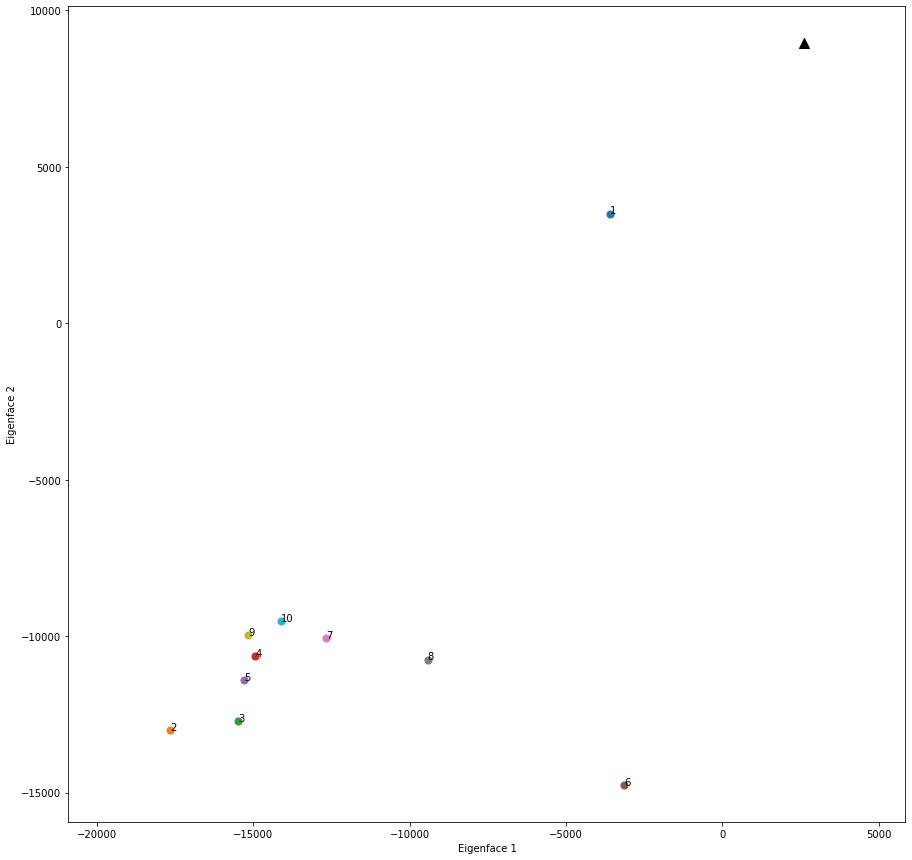

In [73]:
plt.figure(figsize = (15, 15))
plt.axis('equal')
for pasta in range(1, 11):
    images = glob.glob('yalefaces/ind{}/*'.format(pasta))
    images = images[3:4]
    imagens = [Image.open(img).convert('L') for img in images]
    x, y = np.array([identifyImage(pic, 'euclidian', True) for pic in imagens]).T
    plt.scatter(x, y, s = 50)
    plt.text(x, y, pasta)
plt.scatter(*identifyImage(input_img, 'euclidian', True), label = 'Input image', marker = '^', c = 'k', s = 100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')

#### Função que determina o score para uma determinada métrica de distância

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

def getScore(distanceMetric, real):
    predictions = []
    
    images = glob.glob('yalefaces/teste/*')
    i = 0
    
    for image in images:
        predictions.append(identifyImage(
            Image.open(image).convert('L'),
            distanceMetric, False))
        print('\treal person: ', realPersons[i], '\n')
        i += 1
        
    print(confusion_matrix(real, predictions))
    print(classification_report(real, predictions, digits = 3, zero_division = 0))

#### Identificação dos indivíduos de teste

In [75]:
realPersons = ['ind1', 'ind1', 'ind2', 'ind3', 'ind4', 'ind5', 'ind6',
               'ind7', 'ind8', 'ind9', 'ind10', 'Fail', 'Fail', 'Fail', 'Fail',
               'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
               'Fail', 'Fail', 'Fail', 'Fail','Fail', 'Fail', 'Fail', 'Fail']

### Score para Euclidiana

In [76]:
getScore('euclidian', realPersons)

Para a distância:  euclidian
	Pasta ind1
	dist = 1555.4030962683066
	real person:  ind1 

Para a distância:  euclidian
	Pasta ind1
	dist = 1662.018130319177
	real person:  ind1 

Para a distância:  euclidian
	Pasta ind2
	dist = 2679.5183194658284
	real person:  ind2 

Para a distância:  euclidian
	Pasta ind3
	dist = 1214.0592979938965
	real person:  ind3 

Para a distância:  euclidian
	Pasta ind4
	dist = 1308.8307999529713
	real person:  ind4 

Para a distância:  euclidian
	Pasta ind5
	dist = 626.2581170802194
	real person:  ind5 

Para a distância:  euclidian
	Pasta ind6
	dist = 1313.9690374606741
	real person:  ind6 

Para a distância:  euclidian
	Pasta ind7
	dist = 2139.320006002232
	real person:  ind7 

Falhou no reconhecimento.
	real person:  ind8 

Falhou no reconhecimento.
	real person:  ind9 

Para a distância:  euclidian
	Pasta ind10
	dist = 1588.2538899703347
	real person:  ind10 

Falhou no reconhecimento.
	real person:  Fail 

Falhou no reconhecimento.
	real person:  Fail 


### Score para Mahalanobis

In [77]:
getScore('mahalanobis', realPersons)

Para a distância:  mahalanobis
	Pasta ind1
	dist = 0.001262126718371104
	real person:  ind1 

Para a distância:  mahalanobis
	Pasta ind1
	dist = 0.0026825548815732157
	real person:  ind1 

Para a distância:  mahalanobis
	Pasta ind2
	dist = 0.0070832294457229515
	real person:  ind2 

Para a distância:  mahalanobis
	Pasta ind3
	dist = 0.0018551110462934786
	real person:  ind3 

Para a distância:  mahalanobis
	Pasta ind4
	dist = 0.002173442452423218
	real person:  ind4 

Para a distância:  mahalanobis
	Pasta ind5
	dist = 0.00032416412451060056
	real person:  ind5 

Para a distância:  mahalanobis
	Pasta ind6
	dist = 0.0019790895434516976
	real person:  ind6 

Para a distância:  mahalanobis
	Pasta ind7
	dist = 0.006591990956872196
	real person:  ind7 

Falhou no reconhecimento.
	real person:  ind8 

Para a distância:  mahalanobis
	Pasta ind9
	dist = 0.006284386617213485
	real person:  ind9 

Para a distância:  mahalanobis
	Pasta ind10
	dist = 0.0022792463791310703
	real person:  ind10 

Fal